# Setup

In [3]:
! pip3 install numpy==1.26
! pip3 install matplotlib
! pip3 install openmeteo-requests
! pip3 install requests-cache retry-requests
! pip3 install --user matplotlib basemap basemap-data-hires
! pip3 install geopandas cartopy
! pip3 install plotly
! pip3 install geopy
! pip3 install scikit-learn

  Obtaining dependency information for numpy==1.26 from https://files.pythonhosted.org/packages/35/21/9e150d654da358beb29fe216f339dc17f2b2ac13fff2a89669401a910550/numpy-1.26.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 4.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/28/ba/8be09886eb56ac04a218a1dc3fa728a5c4cac60b019b4f1687885166da00/matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/05/46/9256dd162ea

In [4]:
! pip3 install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24284 sha256=732d1715559b3af330c35131748161abb042baf4f0fd5c9bed535bea75d2607d
  Stored in directory: /Users/avishekpandey/Library/Caches/pip/wheels/57/7d/91/f1d0158783f74ab6ad725b00aa6a2c6e976cea652eb72616c6
Successfully built stats

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:
from tensorflow.python.framework import dtypes
# from tensorflow_io.bigquery import BigQueryClient
# from tensorflow_io.bigquery import BigQueryReadSession
from google.cloud import bigquery
from google.oauth2 import service_account
import os

project = 'revx-259410' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/avishekpandey/Downloads/Research/revx-259410-dce35f8557ae.json"
client = bigquery.Client(project=project, location=location)

In [2]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import stats
import math
import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
# from google.colab import drive
# drive.mount('/content/drive')
import os
# os.mkdir('/content/drive/MyDrive/dsp')
os.chdir('/Users/avishekpandey/Downloads/Research/data/')


def plot_custom(fx,fy):
    fig = plt.figure(figsize = (fx,fy))
    ax = plt.axes()
    ax.spines['bottom'].set_color((0.9,0.9,0.9))
    ax.spines['top'].set_color((0.9,0.9,0.9))
    ax.spines['left'].set_color((0.9,0.9,0.9))
    ax.spines['right'].set_color((0.9,0.9,0.9))
    ax.grid(color='lightgrey', linestyle='-', linewidth=0.3)
    ax.set_facecolor((1.0,1.0,1.0))
    fig.patch.set_facecolor((0.9,0.9,0.9))
    fig.patch.set_alpha(0.05)
    return ax,fig

def plot_cosmos(x,xlabel,ylabel,title):
    x.spines['bottom'].set_color((0.9,0.9,0.9))
    x.spines['top'].set_color((0.9,0.9,0.9))
    x.spines['left'].set_color((0.9,0.9,0.9))
    x.spines['right'].set_color((0.9,0.9,0.9))
    x.grid(color='lightgrey', linestyle='-', linewidth=0.3)
    x.set_facecolor((1.0,1.0,1.0))
    x.set_xlabel(xlabel)
    x.set_ylabel(ylabel)
    x.set_title(title)
    fig.patch.set_facecolor((0.9,0.9,0.9))
    fig.patch.set_alpha(0.05)

def plot_texts(xlabel,ylabel,title):
  plt.xlabel(xlabel,fontsize = 13)
  plt.ylabel(ylabel,fontsize = 13)
  plt.title(title,fontsize = 25)
  plt.legend()

# os.chdir('M:\Research\EnergyImbalance\data')



# Import Renewable Energy Resources data

In [3]:
os.listdir()

['.cache.sqlite',
 'household_data.sqlite',
 'renewable_power_plants.sqlite',
 'national_generation_capacity.sqlite',
 'when2heat.sqlite',
 'weather_data.sqlite',
 'WeatherDataV2.sqlite',
 'time_series.sqlite',
 'weather_data.csv',
 'WeatherData.sqlite',
 'conventional_power_plants.sqlite',
 'ninja_pv_wind_profiles.sqlite']

In [4]:
import sqlite3

In [10]:
database_path = 'time_series.sqlite'

# Connect to the SQLite database
connection = sqlite3.connect(database_path)

# Create a cursor object
cursor = connection.cursor()

# Execute a query to retrieve data from a table (replace 'your_table' with your table name)
cursor.execute("select * from time_series_60min_singleindex;")


column_headers = [description[0] for description in cursor.description]

# Fetch all rows of data
rows = cursor.fetchall()

# Create a DataFrame from the fetched data and column headers
time_series = pd.DataFrame(rows, columns=column_headers)

# Close the cursor and connection
cursor.close()
connection.close()

In [13]:
time_series['utc_timestamp'].max(),time_series['utc_timestamp'].min()

('2020-09-30T23:00:00Z', '2014-12-31T23:00:00Z')

In [19]:
job = client.load_table_from_dataframe(time_series, 'Avishek_Explore.load_supply_timeseries')
job.result()

LoadJob<project=revx-259410, location=US, id=c5dc0e83-ca1f-4921-8251-7e936ed8c6f2>

In [5]:
# Path to your .sqlite database file
database_path = 'renewable_power_plants.sqlite'

# Connect to the SQLite database
connection = sqlite3.connect(database_path)

# Create a cursor object
cursor = connection.cursor()

# Execute a query to retrieve data from a table (replace 'your_table' with your table name)
cursor.execute("select * from sqlite_master where type='table';")

# Fetch all rows from the executed query
rows = cursor.fetchall()

# Print the fetched rows
for row in rows:
    print(row)

# Close the cursor and connection
cursor.close()
connection.close()

In [16]:
database_path = 'weather_data.sqlite'

# Connect to the SQLite database
connection = sqlite3.connect(database_path)

# Create a cursor object
cursor = connection.cursor()

# Execute a query to retrieve data from a table (replace 'your_table' with your table name)
cursor.execute("select * from weather_data;")


column_headers = [description[0] for description in cursor.description]

# Fetch all rows of data
rows = cursor.fetchall()

# Create a DataFrame from the fetched data and column headers
df_w2h_eu = pd.DataFrame(rows, columns=column_headers)

# Close the cursor and connection
cursor.close()
connection.close()

In [20]:
job = client.load_table_from_dataframe(df_w2h_eu, 'Avishek_Explore.temperature_aggregated')
job.result()

LoadJob<project=revx-259410, location=US, id=87817c63-e40e-4a0a-8700-ce0589ec3ff8>

In [8]:
df_w2h_eu['energy_source_level_2'].value_counts()

energy_source_level_2
Solar                   2048214
Wind                      38067
Bioenergy                 17543
Hydro                     12072
Geothermal                   13
Marine                        8
Other or unspecified          4
Name: count, dtype: int64

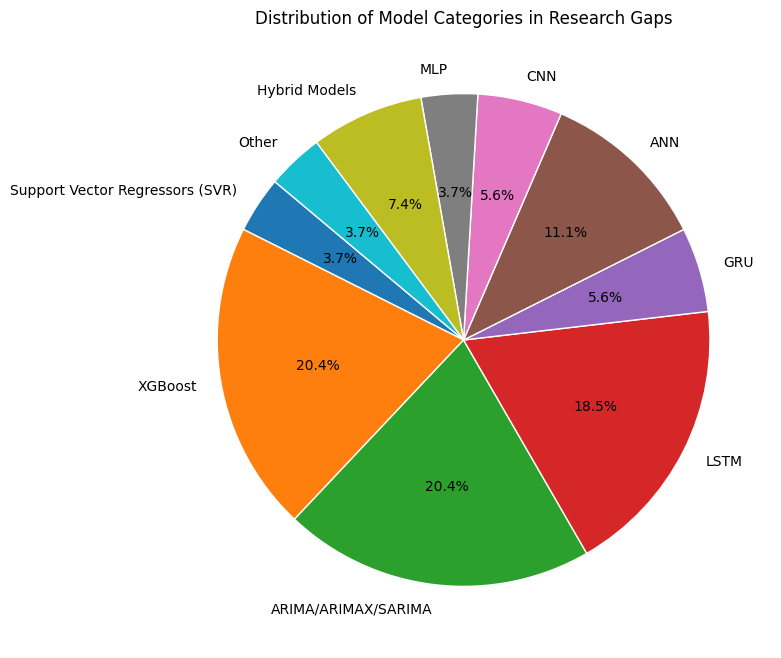

In [8]:
import matplotlib.pyplot as plt

# Lists of models and their respective counts
models = ['Support Vector Regressors (SVR)', 'XGBoost', 'ARIMA/ARIMAX/SARIMA', 
          'LSTM', 'GRU', 'ANN', 'CNN', 'MLP', 'Hybrid Models', 'Other']
counts = [2, 11, 11, 10, 3, 6, 3, 2, 4, 2]

# Creating the pie chart with white borders
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=models, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'white'})  # Adding white borders
plt.title('Distribution of Model Categories in Research Gaps')
plt.show()

In [9]:
df_w2h_eu.shape

(2115921, 16)

In [10]:
lon_lat_capacity = df_w2h_eu[df_w2h_eu['energy_source_level_2']\
                      .isin(['Solar','Wind'])]\
                        .groupby(['energy_source_level_2',
                                  'country','municipality','lat','lon'])['electrical_capacity'].sum()

lon_lat_capacity = pd.DataFrame(lon_lat_capacity).reset_index().sort_values('electrical_capacity', ascending = False)

In [11]:
lon_lat_capacity['ec_cumsum'] = lon_lat_capacity['electrical_capacity'].cumsum()/lon_lat_capacity.electrical_capacity.sum()

In [12]:
lon_lat_capacity = lon_lat_capacity[(lon_lat_capacity['lat'] != None)&(lon_lat_capacity['lat'] != '')&\
                                    (lon_lat_capacity['lon'] != None)&(lon_lat_capacity['lon'] != '')]

In [13]:
lon_lat_capacity[lon_lat_capacity['ec_cumsum'] <= 0.9].shape

(19865, 7)

In [6]:
import pandas as pd
from pandas_gbq import to_gbq
from google.oauth2 import service_account
from tensorflow.python.framework import dtypes
# from tensorflow_io.bigquery import BigQueryClient
# from tensorflow_io.bigquery import BigQueryReadSession
from google.cloud import bigquery
from google.oauth2 import service_account

key_path = r"/Users/avishekpandey/Downloads/Research/revx-259410-dce35f8557ae.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id)

In [7]:
def get_weather_data(lat,lon,start_date, end_date):
    import openmeteo_requests
    import requests_cache
    from retry_requests import retry

    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
    retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
    openmeteo = openmeteo_requests.Client(session = retry_session)

    # Make sure all required weather variables are listed here
    # The order of variables in hourly or daily is important to assign them correctly below
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
                "latitude": lat,
                "longitude": lon,
                "start_date": start_date,
                "end_date": end_date,
                "hourly": [
                           "temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature",
                           "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl",
                           "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high",
                           "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m",
                           "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m",
                           "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm",
                           "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm",
                           "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"
                        ]
                }
    responses = openmeteo.weather_api(url, params=params)

    # Process first location. Add a for-loop for multiple locations or weather models
    response = responses[0]
#     print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
#     print(f"Elevation {response.Elevation()} m asl")
#     print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
#     print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

    # Process hourly data. The order of variables needs to be the same as requested.
    hourly = response.Hourly()
    hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
    hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
    hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
    hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
    hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
    hourly_rain = hourly.Variables(5).ValuesAsNumpy()
    hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
    hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
    hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
    hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
    hourly_surface_pressure = hourly.Variables(10).ValuesAsNumpy()
    hourly_cloud_cover = hourly.Variables(11).ValuesAsNumpy()
    hourly_cloud_cover_low = hourly.Variables(12).ValuesAsNumpy()
    hourly_cloud_cover_mid = hourly.Variables(13).ValuesAsNumpy()
    hourly_cloud_cover_high = hourly.Variables(14).ValuesAsNumpy()
    hourly_et0_fao_evapotranspiration = hourly.Variables(15).ValuesAsNumpy()
    hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
    hourly_wind_speed_10m = hourly.Variables(17).ValuesAsNumpy()
    hourly_wind_speed_100m = hourly.Variables(18).ValuesAsNumpy()
    hourly_wind_direction_10m = hourly.Variables(19).ValuesAsNumpy()
    hourly_wind_direction_100m = hourly.Variables(20).ValuesAsNumpy()
    hourly_wind_gusts_10m = hourly.Variables(21).ValuesAsNumpy()
    hourly_soil_temperature_0_to_7cm = hourly.Variables(22).ValuesAsNumpy()
    hourly_soil_temperature_7_to_28cm = hourly.Variables(23).ValuesAsNumpy()
    hourly_soil_temperature_28_to_100cm = hourly.Variables(24).ValuesAsNumpy()
    hourly_soil_temperature_100_to_255cm = hourly.Variables(25).ValuesAsNumpy()
    hourly_soil_moisture_0_to_7cm = hourly.Variables(26).ValuesAsNumpy()
    hourly_soil_moisture_7_to_28cm = hourly.Variables(27).ValuesAsNumpy()
    hourly_soil_moisture_28_to_100cm = hourly.Variables(28).ValuesAsNumpy()
    hourly_soil_moisture_100_to_255cm = hourly.Variables(29).ValuesAsNumpy()
    hourly_shortwave_radiation = hourly.Variables(1).ValuesAsNumpy()
    hourly_direct_radiation = hourly.Variables(2).ValuesAsNumpy()
    hourly_diffuse_radiation = hourly.Variables(3).ValuesAsNumpy()
    hourly_direct_normal_irradiance = hourly.Variables(4).ValuesAsNumpy()
    hourly_global_tilted_irradiance = hourly.Variables(5).ValuesAsNumpy()
    hourly_terrestrial_radiation = hourly.Variables(6).ValuesAsNumpy()
    hourly_shortwave_radiation_instant = hourly.Variables(7).ValuesAsNumpy()
    hourly_direct_radiation_instant = hourly.Variables(8).ValuesAsNumpy()
    hourly_diffuse_radiation_instant = hourly.Variables(9).ValuesAsNumpy()
    hourly_direct_normal_irradiance_instant = hourly.Variables(10).ValuesAsNumpy()
    hourly_global_tilted_irradiance_instant = hourly.Variables(11).ValuesAsNumpy()
    hourly_terrestrial_radiation_instant = hourly.Variables(12).ValuesAsNumpy()

    hourly_data = pd.DataFrame()

    date_range = pd.date_range(
        start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
        end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
        freq = pd.Timedelta(seconds = hourly.Interval())
#         inclusive = "left"
    )

    date_range_list = date_range.tolist()

#     print(date_range_list)

    hourly_data['date_hour'] = date_range_list[:-1]

    hourly_data["temperature_2m"] = hourly_temperature_2m
    hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
    hourly_data["dew_point_2m"] = hourly_dew_point_2m
    hourly_data["apparent_temperature"] = hourly_apparent_temperature
    hourly_data["precipitation"] = hourly_precipitation
    hourly_data["rain"] = hourly_rain
    hourly_data["snowfall"] = hourly_snowfall
    hourly_data["snow_depth"] = hourly_snow_depth
    hourly_data["weather_code"] = hourly_weather_code
    hourly_data["pressure_msl"] = hourly_pressure_msl
    hourly_data["surface_pressure"] = hourly_surface_pressure
    hourly_data["cloud_cover"] = hourly_cloud_cover
    hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
    hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
    hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
    hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
    hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
    hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
    hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
    hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
    hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
    hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
    hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
    hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
    hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
    hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
    hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
    hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
    hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
    hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm
    hourly_data["temperature_2m"] = hourly_temperature_2m
    hourly_data["shortwave_radiation"] = hourly_shortwave_radiation
    hourly_data["direct_radiation"] = hourly_direct_radiation
    hourly_data["diffuse_radiation"] = hourly_diffuse_radiation
    hourly_data["direct_normal_irradiance"] = hourly_direct_normal_irradiance
    hourly_data["global_tilted_irradiance"] = hourly_global_tilted_irradiance
    hourly_data["terrestrial_radiation"] = hourly_terrestrial_radiation
    hourly_data["shortwave_radiation_instant"] = hourly_shortwave_radiation_instant
    hourly_data["direct_radiation_instant"] = hourly_direct_radiation_instant
    hourly_data["diffuse_radiation_instant"] = hourly_diffuse_radiation_instant
    hourly_data["direct_normal_irradiance_instant"] = hourly_direct_normal_irradiance_instant
    hourly_data["global_tilted_irradiance_instant"] = hourly_global_tilted_irradiance_instant
    hourly_data["terrestrial_radiation_instant"] = hourly_terrestrial_radiation_instant

#     print(hourly_data)
    hourly_dataframe = pd.DataFrame(data = hourly_data)
    return hourly_dataframe

In [30]:
# from sklearn.cluster import DBSCAN
# from geopy.distance import great_circle
# from geopy.point import Point

# # Sample data: list of (latitude, longitude) points
# coords = lon_lat_capacity[['lon','lat']]

# # Define the function to compute the Haversine distance
# def haversine_distance(p1, p2):
#     return great_circle(p1, p2).km

# # Apply DBSCAN with a custom distance metric (Haversine distance)
# # Convert eps from kilometers to radians
# kms_per_radian = 6371.0088
# epsilon = 20 / kms_per_radian  # 20 kilometers

# # Perform DBSCAN clustering
# db = DBSCAN(eps=epsilon, min_samples=2, metric=lambda x, y: haversine_distance((x[0], x[1]), (y[0], y[1]))).fit(coords)
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print(f'Estimated number of clusters: {n_clusters_}')
# print(f'Estimated number of noise points: {n_noise_}')

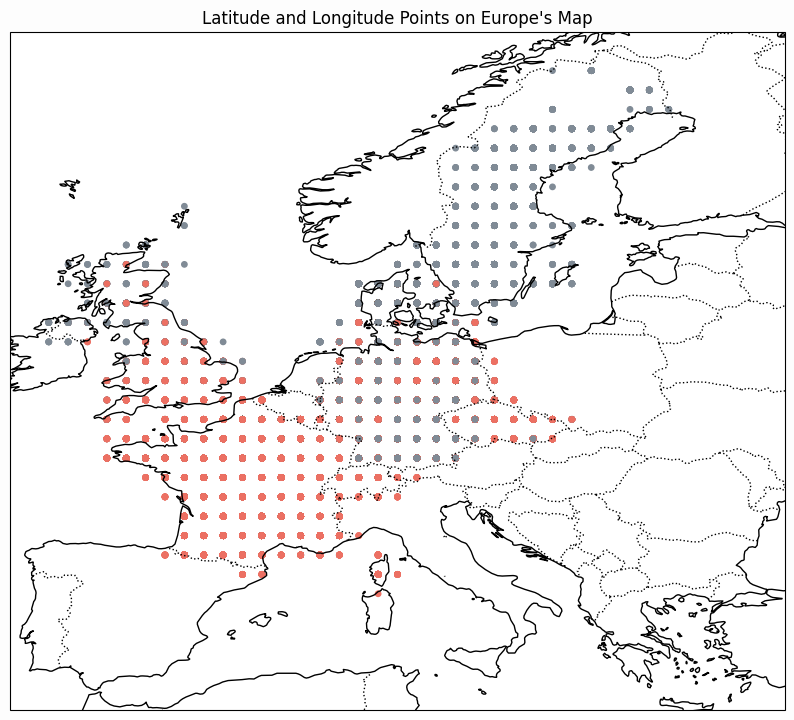

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sample data: list of (latitude, longitude) points
latitudes = lon_lat_capacity[lon_lat_capacity['lat'] != None]['lat'].apply(lambda x : round(float(x),0))  # Paris, Berlin, London
longitudes = lon_lat_capacity[lon_lat_capacity['lon'] != None]['lon'].apply(lambda x : round(float(x),0))

# Create a GeoDataFrame with the points
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitudes, latitudes))

# Create a plot with Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-10, 30, 35, 70], crs=ccrs.PlateCarree())

# Add features to the plot
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the points
gdf.plot(ax=ax, marker='o', c=lon_lat_capacity['energy_source_level_2'].apply(lambda x : '#EC7063' if x == 'Solar' else '#808B96')
                                                                              , markersize=15, transform=ccrs.PlateCarree())

# Add title and show the plot
plot_cosmos(ax,"Longitude","Latitude","Latitude and Longitude Points on Europe's Map")
plt.show()

In [8]:
# @title UK
weather_data = []
start_date = "2013-01-01"
end_date = "2024-07-01"

hdf = get_weather_data(51.1657,10.4515,start_date, end_date)
hdf['lat'] = 51.1657 
hdf['lon'] = 10.4515
hdf['country'] = 'UK'
# hdf['energy'] = energy
weather_data.append(hdf)
weather_data = pd.concat(weather_data)
job = client.load_table_from_dataframe(weather_data, 'Avishek_Explore.weather_data_DE_overall')
job.result()

LoadJob<project=revx-259410, location=US, id=433be05c-3e0a-454b-b924-df9c6366a6e4>

In [ ]:
weather_data = []
start_date = "2021-01-01"
end_date = "2024-07-01"
renewable_loc = lon_lat_capacity[(lon_lat_capacity['ec_cumsum'] <= 0.9) & (lon_lat_capacity['country'] == 'UK')][['lat','lon','country']].drop_duplicates()
renewable_loc['lon'] = renewable_loc['lon'].apply(lambda x : round(float(x)))
renewable_loc['lat'] = renewable_loc['lat'].apply(lambda x : round(float(x)))
renewable_loc.drop_duplicates(inplace = True)
for ind,data in tqdm(renewable_loc.iterrows(),total = len(renewable_loc)):
    lat,lon,country = data
    try:
        hdf = get_weather_data(lat,lon,start_date, end_date)
        hdf['lat'] = lat
        hdf['lon'] = lon
        hdf['country'] = country
        # hdf['energy'] = energy
        weather_data.append(hdf)
    except Exception as e:
        pass

weather_data = pd.concat(weather_data)

In [ ]:
job = client.load_table_from_dataframe(weather_data, 'Avishek_Explore.weather_data_UK_V1')
job.result()

In [20]:
weather_data = pd.concat(weather_data)

In [21]:
weather_data.shape

(1394112, 47)

In [22]:
weather_data.head()

,date_hour,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant,lat,lon,country,energy
0,2021-01-01 00:00:00+00:00,6.95,84.400925,4.50,2.476979,0.7,0.7,0.0,NaN,53.0,...,NaN,53.0,1006.500000,1006.500000,96.899994,87.0,54,1,UK,Wind
1,2021-01-01 01:00:00+00:00,7.15,77.883484,3.55,3.296109,0.2,0.2,0.0,NaN,51.0,...,NaN,51.0,1006.500000,1006.500000,24.300001,19.0,54,1,UK,Wind
2,2021-01-01 02:00:00+00:00,7.20,75.992409,3.25,3.223222,0.0,0.0,0.0,NaN,1.0,...,NaN,1.0,1006.900024,1006.900024,26.099998,17.0,54,1,UK,Wind
3,2021-01-01 03:00:00+00:00,7.25,75.732986,3.25,3.305474,0.0,0.0,0.0,NaN,1.0,...,NaN,1.0,1007.299988,1007.299988,31.500000,25.0,54,1,UK,Wind
4,2021-01-01 04:00:00+00:00,7.30,75.208481,3.20,3.066750,0.0,0.0,0.0,NaN,1.0,...,NaN,1.0,1007.099976,1007.099976,40.799999,30.0,54,1,UK,Wind


In [24]:
weather_data[weather_data['country'] == 'UK']['date_hour'].max()

Timestamp('2024-01-01 23:00:00+0000', tz='UTC')

In [28]:
os.getcwd()

'/home/avishekpandey/ResearchandDevelopment/Research/data'

In [29]:
import sqlite3
conn = sqlite3.connect('WeatherDataV2.sqlite')
weather_data.to_sql('weatherDataV2', conn, if_exists='replace', index=False)

1394112

In [33]:
job = client.load_table_from_dataframe(weather_data, 'Avishek_Explore.weather_data_UK')
job.result()

LoadJob<project=revx-259410, location=US, id=1852b019-b06f-4741-bb9c-8bb295c861ba>

In [ ]:
# Define the job configuration for overwriting the table
job_config = bigquery.LoadJobConfig(
    write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE
)

# Upload the DataFrame to BigQuery
job = client.load_table_from_dataframe(weather_data, 'Avishek_Explore.weather_data_UK', job_config=job_config)